In [1]:
import osmnx as ox
import sys
sys.path.append("./../scripts")
import simplify_vertices as sv
import eulerian_path as ep

## Parcours du drone

### Simulation sur une petite zone d'un arrondissement

In [2]:
G = [(2187161104, 301495983, 42.542), (2187161104, 2187161105, 37.878), (2187161104, 2187161117, 67.978), (2187161104, 2187161118, 101.438), (301495983, 615017544, 66.387), (301495983, 615017546, 73.866), (301495983, 2187162903, 40.899), (2187161105, 2187161113, 34.982), (2187161105, 2187161106, 121.617), (2187161117, 615017544, 40.396), (2187161117, 371474024, 69.239), (2187161118, 2187161106, 44.747), (2187161118, 371474024, 73.995), (2187161118, 615001828, 38.42), (2187161113, 2187161109, 140.759), (2187161113, 615017546, 41.433), (2187161106, 2187161109, 37.106), (2187161109, 615001834, 37.605), (615001834, 615001828, 84.301), (615001834, 615001836, 122.592), (615017546, 2187162922, 40.279), (615017544, 615017532, 74.543), (615017544, 2187162910, 40.654), (371474024, 615001826, 38.812), (615001828, 615001826, 77.42), (615001828, 615001830, 15.593), (615017532, 248511702, 71.909), (615017532, 2188531350, 72.924), (615017532, 2187162915, 41.737), (248511702, 2188531370, 32.518), (248511702, 2187162887, 41.736), (2188531350, 2188531370, 85.13), (2188531350, 615001807, 39.419), (2187162915, 2187162880, 41.084), (2187162915, 2187162900, 247.958), (2187162915, 2187162918, 36.514), (615017534, 2188531388, 35.57), (615017534, 2189049774, 34.301), (615017534, 615017535, 77.436), (2188531388, 2188531373, 38.236), (2188531388, 2188531381, 38.503), (2188531388, 2188531396, 119.103), (2189049774, 2189049736, 113.266), (2189049774, 2189049737, 37.578), (615017535, 2189049755, 34.145), (615017535, 2188531375, 37.001), (615017535, 615017537, 71.644), (2189049755, 2189049737, 40.629), (2189049755, 2189049740, 5.584), (2188531375, 2187162920, 4.948), (2188531375, 2188531381, 38.693), (615017537, 2187162900, 42.729), (615017537, 2189049760, 39.307), (615017537, 615017543, 70.628), (2187162900, 2187162890, 37.378), (2187162900, 2187162898, 38.86), (2189049760, 2189049759, 248.819), (2189049760, 2189049777, 36.955), (2189049760, 2189049765, 36.575), (615017543, 615017538, 67.255), (615017543, 2189049757, 38.899), (615017543, 2187162905, 43.081), (615017538, 2187162893, 39.867), (615017538, 2189049739, 41.996), (2187162893, 2187162903, 247.85699999999997), (2187162893, 2187162912, 35.006), (2189049739, 2189049754, 34.856), (2189049757, 2189049754, 32.723), (2189049757, 2189049763, 249.076), (2189049757, 2189049765, 33.25), (2187162905, 2187162898, 31.656), (2187162905, 2187162912, 32.537), (2187162905, 2187162910, 248.53), (2187162910, 2187162880, 32.431), (2187162910, 2187162885, 33.797), (2187162922, 2187162903, 74.343), (615017584, 2189049736, 180.975), (615017584, 615017585, 84.696), (2140361825, 615001811, 228.54), (2140361825, 615001830, 10.936), (615001811, 9256960176, 7.414), (615001811, 615001817, 15.746), (615001826, 615001807, 79.669), (2189049736, 2189049764, 39.572), (615017585, 615017586, 70.446), (615017585, 2189049771, 40.821), (615017586, 615017587, 64.125), (615017586, 2189049759, 40.295), (2189049771, 2189049732, 35.021), (2189049771, 2189049764, 181.114), (2189049771, 2189049768, 136.215), (615017587, 2189049763, 40.334), (2189049759, 2189049732, 35.578), (2189049759, 2189049742, 34.047), (2189049763, 2189049742, 30.881), (2189049763, 2189049761, 35.082), (2188531370, 9306783005, 4.733), (2188531370, 615001817, 41.681000000000004), (615001807, 615001817, 83.134), (2188531362, 2187162887, 127.62), (2188531362, 2187162920, 121.265), (2188531362, 2188531384, 37.449), (2187162887, 2187162918, 35.579), (2187162887, 9306783005, 76.72800000000001), (2187162920, 2187162890, 34.32), (2188531384, 2188531381, 126.342), (2188531384, 2188531392, 184.89), (2188531384, 2188531394, 38.902), (2188531373, 2188531386, 118.978), (9306783005, 9256960177, 41.67200000000001), (9306783005, 2188531392, 33.845), (615001817, 9256960177, 7.531), (2188531386, 2188531396, 38.422), (9256960176, 9256960177, 15.667), (9256960177, 615001803, 75.58300000000001), (615001803, 1764326134, 41.367000000000004), (2187162903, 2187162885, 33.131), (1764326134, 2188531392, 43.505), (1764326134, 2188531394, 166.316), (2188531394, 2188531396, 7.358), (615001836, 615001851, 75.47500000000001), (2187162880, 2187162898, 248.257), (2187162885, 2187162912, 248.182), (2187162918, 2187162890, 248.475), (2189049732, 2189049777, 248.402), (2189049777, 2189049740, 34.534), (2189049764, 2189049737, 115.259), (2189049764, 2189049768, 41.31), (2189049754, 2189049761, 249.049), (2189049740, 2189049768, 111.751), (2189049742, 2189049765, 248.955)]
l = sv.extract_vertices(G)
G2 = sv.replace_vertices(G, l)
print("Graphe initial:", G2)

Graphe initial: [(0, 1, 42.542), (0, 2, 37.878), (0, 3, 67.978), (0, 4, 101.438), (1, 5, 66.387), (1, 6, 73.866), (1, 7, 40.899), (2, 8, 34.982), (2, 9, 121.617), (3, 5, 40.396), (3, 10, 69.239), (4, 9, 44.747), (4, 10, 73.995), (4, 11, 38.42), (8, 12, 140.759), (8, 6, 41.433), (9, 12, 37.106), (12, 13, 37.605), (13, 11, 84.301), (13, 14, 122.592), (6, 15, 40.279), (5, 16, 74.543), (5, 17, 40.654), (10, 18, 38.812), (11, 18, 77.42), (11, 19, 15.593), (16, 20, 71.909), (16, 21, 72.924), (16, 22, 41.737), (20, 23, 32.518), (20, 24, 41.736), (21, 23, 85.13), (21, 25, 39.419), (22, 26, 41.084), (22, 27, 247.958), (22, 28, 36.514), (29, 30, 35.57), (29, 31, 34.301), (29, 32, 77.436), (30, 33, 38.236), (30, 34, 38.503), (30, 35, 119.103), (31, 36, 113.266), (31, 37, 37.578), (32, 38, 34.145), (32, 39, 37.001), (32, 40, 71.644), (38, 37, 40.629), (38, 41, 5.584), (39, 42, 4.948), (39, 34, 38.693), (40, 27, 42.729), (40, 43, 39.307), (40, 44, 70.628), (27, 45, 37.378), (27, 46, 38.86), (43, 47

In [3]:
path = ep.convert_and_find_eulerian_path(len(l), G2)
print("Chemin avec noeuds simplifiés:", path, '\n')
path = sv.replace_vertices_back_in_path(path, l)
print("Chemin final:", path)

Chemin avec noeuds simplifiés: [82, 14, 13, 18, 11, 13, 12, 9, 4, 10, 3, 10, 18, 25, 21, 25, 64, 79, 63, 62, 81, 76, 73, 24, 28, 26, 46, 55, 58, 6, 15, 7, 58, 17, 26, 22, 28, 45, 42, 45, 27, 40, 43, 48, 41, 70, 65, 67, 70, 36, 65, 37, 38, 41, 48, 69, 71, 49, 56, 72, 57, 71, 47, 69, 67, 60, 66, 47, 43, 49, 51, 56, 54, 50, 53, 55, 52, 17, 5, 3, 0, 4, 11, 19, 61, 62, 64, 23, 73, 79, 80, 81, 77, 35, 77, 75, 34, 39, 42, 74, 75, 76, 20, 23, 21, 16, 22, 27, 46, 52, 44, 51, 57, 68, 66, 60, 59, 36, 31, 29, 31, 37, 38, 32, 39, 34, 30, 35, 78, 33, 30, 29, 32, 40, 44, 50, 53, 7, 1, 6, 8, 2, 9, 12, 8, 2, 0, 1, 5, 16, 20, 24, 74] 

Chemin final: [615001851, 615001836, 615001834, 615001826, 615001828, 615001834, 2187161109, 2187161106, 2187161118, 371474024, 2187161117, 371474024, 615001826, 615001807, 2188531350, 615001807, 615001817, 9256960177, 9256960176, 615001811, 1764326134, 2188531392, 9306783005, 2187162887, 2187162918, 2187162880, 2187162898, 2187162912, 2187162885, 615017546, 2187162922, 2

On peut voir que sur un graphe plus grand, représentant déjà une partie de la ville, nos algorithmes fonctionnent toujours.

On va donc pouvoir passer à des graphes encore plus grands cette fois.

### Application sur les 19 arrondissements

In [4]:
G_1 = ox.load_graphml('../data/graph.graphml')
G_2 = ox.load_graphml('../data/graph2.graphml')
G_3 = ox.load_graphml('../data/graph3.graphml')
G_4 = ox.load_graphml('../data/graph4.graphml')
G_5 = ox.load_graphml('../data/graph5.graphml')
G_6 = ox.load_graphml('../data/graph6.graphml')
G_7 = ox.load_graphml('../data/graph7.graphml')
G_8 = ox.load_graphml('../data/graph8.graphml')
G_9 = ox.load_graphml('../data/graph9.graphml')
G_10 = ox.load_graphml('../data/graph10.graphml')
G_11 = ox.load_graphml('../data/graph11.graphml')
G_12 = ox.load_graphml('../data/graph12.graphml')
G_13 = ox.load_graphml('../data/graph13.graphml')
G_14 = ox.load_graphml('../data/graph14.graphml')
G_15 = ox.load_graphml('../data/graph15.graphml')
G_16 = ox.load_graphml('../data/graph16.graphml')
G_17 = ox.load_graphml('../data/graph17.graphml')
G_18 = ox.load_graphml('../data/graph18.graphml')
G_19 = ox.load_graphml('../data/graph19.graphml')

L = [G_1, G_2, G_3, G_4, G_5, G_6, G_7, G_8, G_9, G_10, G_11, G_12, G_13, G_14, G_15, G_16, G_17, G_18, G_19]

In [5]:
# convert given graph to our format
def decomplexify_tograph(graph):
    node_list = graph.edges(data=True)
    to_graph = []
    for node in node_list:
        dist = node[2]["length"]
        n1 = node[0]
        n2 = node[1]
        to_graph.append((n1, n2, dist))
    return to_graph

In [6]:
# convert every graph in L
for i in range(len(L)):
    L[i] = decomplexify_tograph(L[i])

# get the list of the total length of each district
initial_dist = []
for g in L:
    d = 0
    for _,_,w in g:
        d += w
    initial_dist.append(d)

In [7]:
paths = []

# process our algo on every graph and store the result in paths
for i in range(len(L)):
    print("Processing on borough n°%d of Montréal" % (i + 1))
    vertices = sv.extract_vertices(L[i])
    n = len(vertices)
    graph = sv.replace_vertices(L[i], vertices)
    graph = ep.to_eulerian(n, graph)
    L[i] = sv.replace_vertices_back(graph, vertices)
    path = ep.find_eulerian_path(n, graph)
    final_path = sv.replace_vertices_back_in_path(path, vertices)
    paths.append(final_path)
    print("Path found!", '\n')

Processing on borough n°1 of Montréal
Path found! 

Processing on borough n°2 of Montréal
Path found! 

Processing on borough n°3 of Montréal
Path found! 

Processing on borough n°4 of Montréal
Path found! 

Processing on borough n°5 of Montréal
Path found! 

Processing on borough n°6 of Montréal
Path found! 

Processing on borough n°7 of Montréal
Path found! 

Processing on borough n°8 of Montréal
Path found! 

Processing on borough n°9 of Montréal
Path found! 

Processing on borough n°10 of Montréal
Path found! 

Processing on borough n°11 of Montréal
Path found! 

Processing on borough n°12 of Montréal
Path found! 

Processing on borough n°13 of Montréal
Path found! 

Processing on borough n°14 of Montréal
Path found! 

Processing on borough n°15 of Montréal
Path found! 

Processing on borough n°16 of Montréal
Path found! 

Processing on borough n°17 of Montréal
Path found! 

Processing on borough n°18 of Montréal
Path found! 

Processing on borough n°19 of Montréal
Path found! 



On va maintenant afficher par exemple le chemin du 1er arrondissement pour vérifier que celui-ci recouvre bien toutes les rues.

On peut voir sur l'image ci-dessous que le 1er chemin recouvre bien l'entièreté du 1er arrondissement de la ville et on a donc la confirmation que notre algorithme fonctionne toujours sur des graphes plus complexes.

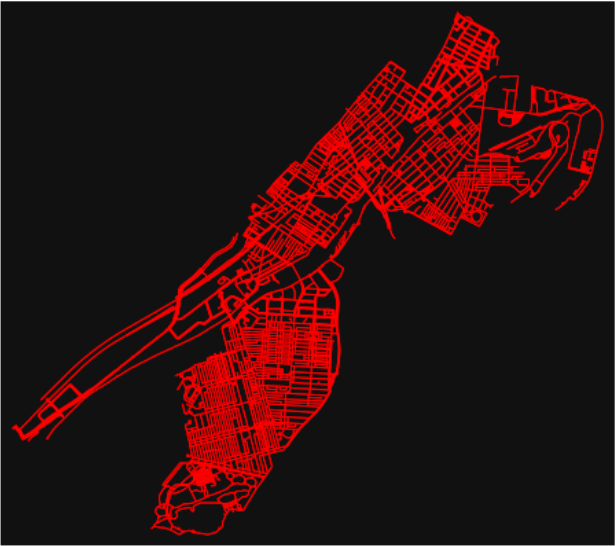

In [8]:
# get the list of the total length of each district
final_dist = []
for g in L:
    d = 0
    for _,_,w in g:
        d += w
    final_dist.append(d)

montreal_dist = 0
total_dist = 0
for i in range(len(final_dist)):
    montreal_dist += initial_dist[i]
    total_dist += final_dist[i]
    print("Difference of distance in borough n°%d:" % (i + 1), final_dist[i] - initial_dist[i])
print("Initial total distance of montreal streets:", montreal_dist)
print("Total distance traveled by the drone inside all boroughs:", total_dist)

Difference of distance in borough n°1: 0.0
Difference of distance in borough n°2: 0.0
Difference of distance in borough n°3: 0.0
Difference of distance in borough n°4: 0.0
Difference of distance in borough n°5: 0.0
Difference of distance in borough n°6: 0.0
Difference of distance in borough n°7: 0.0
Difference of distance in borough n°8: 0.0
Difference of distance in borough n°9: 0.0
Difference of distance in borough n°10: 0.0
Difference of distance in borough n°11: 0.0
Difference of distance in borough n°12: 9640.023000000074
Difference of distance in borough n°13: 0.0
Difference of distance in borough n°14: 0.0
Difference of distance in borough n°15: 0.0
Difference of distance in borough n°16: 0.0
Difference of distance in borough n°17: 0.0
Difference of distance in borough n°18: 0.0
Difference of distance in borough n°19: 0.0
Initial total distance of montreal streets: 12960320.593000034
Total distance traveled by the drone inside all boroughs: 12969960.616000034


## Trouver le chemin le plus court pour passer d'un arrondissment à l'autre

Le but va être maintenant d'optimiser le chemin du drone entre les arrondissements.

Pour cela il va d'abord falloir afficher tous les noeuds d'entrée et de sortie des différents chemins.

In [9]:
# return the list of tuple representing the starting and ending node of each path
def get_start_and_end(paths):
    res = []
    for p in paths:
        res.append((p[0], p[len(p)-1]))
    return res

In [10]:
start_end = get_start_and_end(paths)
print(start_end)

[(31703078, 31703078), (32662002, 32662002), (224886238, 224886238), (224806465, 224806465), (109828183, 109828183), (31278805, 31278805), (109828183, 109828183), (29239079, 29239079), (26232893, 26232893), (116415771, 116415771), (96049028, 96049028), (1700518214, 1700534185), (109828183, 109828183), (224911407, 224911407), (215622916, 215622916), (29217072, 29217072), (29287991, 29287991), (26232481, 26232481), (31630405, 31630405)]


On peut noter que dans les sous graphes des arrondissements on obtient à chaque fois des cycles eulerien (en utilisant toujours le même algo) et donc le noeud d'entrée est toujours le noeud de sortie.

In [11]:
start = [s for s,_ in start_end]

In [12]:
print(start)

[31703078, 32662002, 224886238, 224806465, 109828183, 31278805, 109828183, 29239079, 26232893, 116415771, 96049028, 1700518214, 109828183, 224911407, 215622916, 29217072, 29287991, 26232481, 31630405]


In [13]:
# get the graph of Montreal
Montreal = ox.graph_from_place("Montreal, Canada", network_type="walk")

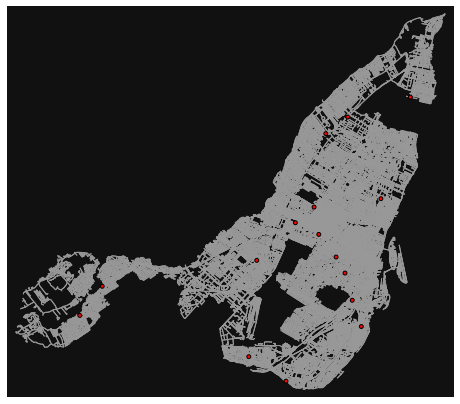

In [14]:
# show each vertex on the map
ef = ['r' if u in start else 'w' for u in Montreal.nodes()]
size =  [15 if u in start else 0 for u in Montreal.nodes()]
fig, ax = ox.plot_graph(Montreal, node_color=ef, node_edgecolor='k', node_size=size)

In [17]:
# list containing latitude and longitude of each point from the map above
pos = [(45.485313, -73.865457), (45.495893, -73.852471), (45.510230, -73.688313), (45.442073, -73.692638), (45.421909, -73.652107), (45.467090, -73.581489), (45.482014, -73.578055), (45.495902, -73.588271), (45.519084, -73.594651), (45.537522, -73.611908), (45.542098, -73.641250), (45.554446, -73.621424), (45.555141, -73.586321), (45.583388, -73.629823), (45.615901, -73.596151), (45.643865, -73.513725)]

def get_graph_from_pos(pos):
    g = []
    for i in range(len(pos)):
        for j in range(len(pos)):
            if i != j:
                g.append((i, j, ox.distance.great_circle_vec(pos[i][0], pos[i][1], pos[j][0], pos[j][1])))
    return g

# create a graph where all nodes are connected to each other with weight representing the distance between them
ga = get_graph_from_pos(pos)

def find_edge(edges, v):
    for (a,b,c) in edges:
        if a == v or b == v:
            return (a,b,c)
    return None

def getNexts(G, v1):
    res = []
    for i in range (len(G)):
        if (G[i][0] == v1 or G[i][1] == v1):
            res.append(G[i])
    return res

def pathSub(G, v1, v2):
    min = []
    nexts = getNexts(G, v1)
    k = 0
    while (True):
        for i in range (len(nexts)):
            if (nexts[i][0] == v2 or nexts[i][1] == v2):
                min.append(v2)
                return min
        for i in range (len(nexts)):
            tmp = pathSub(G, nexts[i][0], v2)
            for i in range(len(tmp)):
                min.append(tmp[i])
        k += 1
        if (k > 10000):
            break
    return min

# function to find the shortest path between the first and the last node of a graph visiting all nodes
def get_shortest_path(n, G, v1, v2):
    copy = []
    for i in range(len(G)):
        copy.append(G[i])
    stack = [G[0][0]]
    path = [v1]
    while stack:
        v = stack[-1]
        edge = find_edge(G, v)
        if edge:
            u = edge[0]
            if u == v:
                u = edge[1]
            stack.append(u)
            G.remove(edge)
        else:
            path.append(stack.pop())
    res = []
    sub = pathSub(copy, v1, path[0])
    end = pathSub(copy, path[len(path) - 1], v2)
    for i in range (len(sub)):
        res.append(sub[i])
    for i in range (len(path)):
        res.append(path[i])
    for i in range(len(end)):
        res.append(end[i])
    if (res[0] == res[1]):
        res.pop(0)
    return res

shortest = get_shortest_path(len(pos), ga, 0, len(pos)-1)

On peut donc voir sur l'image ci-dessus les différents points par lesquels le drone devra passer pour se déplacer d'un arrondissement à l'autre.

Le chemin le plus optimisé pour le drone entre chaque arrondissment est donc le suivant:

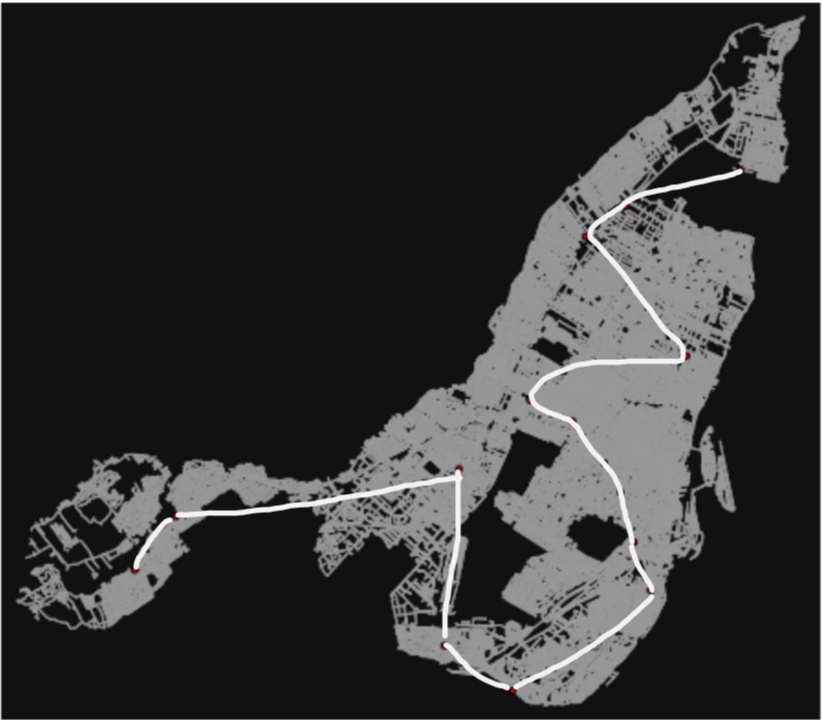